In [4]:
# installing packages for the virtual environment 
#pip install pandas numpy scikit-learn seaborn matplotlib yfinance 

In [15]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf  #api that downloads daily stock index prices

In [11]:
# adding the ticker class which will enable to download price history for "GSPC"
sp500 = yf.Ticker("^GSPC")

In [12]:
# querying the hitorical price from begining when idex was created
sp500 = sp500.history(period = 'max')

In [13]:
# looking at the data
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-17 00:00:00-04:00,5431.109863,5488.500000,5420.399902,5473.229980,3447840000,0.0,0.0
2024-06-18 00:00:00-04:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000,0.0,0.0
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,0.0,0.0


**Inferences**
- Each row is the price of stocks each trading day hence non-trading days are not included on the data.
- Open  - referce to the opening price of trade that day
- High - referce to the highest price of trade that day
- Low - referce to the lowest price of trade that day
- Close - Closing price of trade that day
- Volumne - total number of shares been bought on that day
- We are not going to use the Dividends and Stock Splits for prediction

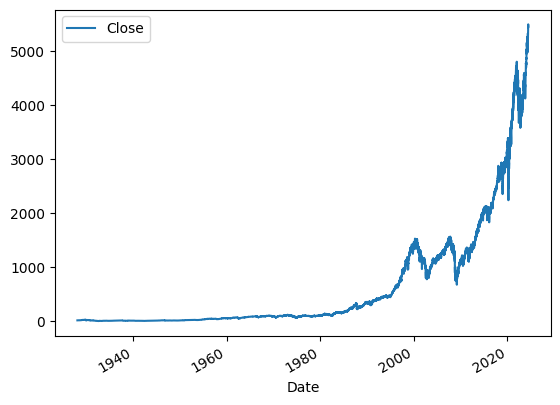

In [17]:
#plotting the data
sp500.plot.line(y = 'Close',use_index = True)
plt.show()

There looks an upward trend in the data

In [18]:
# removing the unwanted columns

sp500 = sp500.drop(['Dividends','Stock Splits'],axis = 1)
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-06-17 00:00:00-04:00,5431.109863,5488.500000,5420.399902,5473.229980,3447840000
2024-06-18 00:00:00-04:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000
